# Convolutional Neural Networks

Realizaremos un ejercicio descrito en el blog www.aprendemachinelearning.com para hacer reconocimiento de imágenes.

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [30]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU
print(tensorflow.__version__)

2.12.0


# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(), 'DataSet', 'train')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath, topdown=True):
    
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            img_rgb = plt.imread(filepath)
            images.append(img_rgb)            
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
                       
    if cant>0:
        print(root, cant)
        directories.append(root)
        dircount.append(cant)
        cant=0

print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /home/ntrujillo/git-hub/meat-grader/DataSet/train/
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_03 213
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_04 105
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_05 949
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_02 62
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_07 204
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_06 37
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_08 63
Directorios leidos: 7
Imagenes en cada directorio [213, 105, 949, 62, 204, 37, 63]
suma Total de imagenes en subdirs: 1633


In [4]:
print(images[0])

[[[0.85882354 0.8862745  0.6745098 ]
  [0.8862745  0.9019608  0.69803923]
  [0.8980392  0.9137255  0.7137255 ]
  ...
  [0.00784314 0.01960784 0.        ]
  [0.01176471 0.02352941 0.        ]
  [0.02352941 0.03529412 0.        ]]

 [[0.8862745  0.9137255  0.6862745 ]
  [0.8980392  0.91764706 0.7019608 ]
  [0.89411765 0.9137255  0.6901961 ]
  ...
  [0.03137255 0.04313726 0.00392157]
  [0.00784314 0.01960784 0.        ]
  [0.00784314 0.01960784 0.        ]]

 [[0.8901961  0.9098039  0.6627451 ]
  [0.8784314  0.8980392  0.6509804 ]
  [0.85490197 0.8745098  0.62352943]
  ...
  [0.02745098 0.03921569 0.00392157]
  [0.         0.01176471 0.        ]
  [0.         0.01176471 0.        ]]

 ...

 [[0.62352943 0.5568628  0.32156864]
  [0.62352943 0.56078434 0.32156864]
  [0.62352943 0.5568628  0.31764707]
  ...
  [0.25490198 0.16078432 0.09019608]
  [0.25490198 0.16078432 0.08627451]
  [0.25882354 0.16470589 0.09019608]]

 [[0.61960787 0.56078434 0.32156864]
  [0.61960787 0.5647059  0.32156864]


# Creamos las etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  1633


In [6]:
meat=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    meat.append(name[len(name)-1])
    indice=indice+1

0 CLASS_03
1 CLASS_04
2 CLASS_05
3 CLASS_02
4 CLASS_07
5 CLASS_06
6 CLASS_08


In [7]:
y = np.array(labels)
#X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
X = np.array(images) #convierto de lista a numpy
#print('X', X)
#print('y',y)
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', len(classes))
print('Output classes : ', nClasses)



#Display the first image in training data
#plt.figure(figsize=[5,5])
#plt.imshow(X[0], cmap=plt.get_cmap('gray'))
#plt.title("Imagen")

Total number of outputs :  7
Output classes :  7


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1306, 216, 384, 3) (1306,)
Testing data shape :  (327, 216, 384, 3) (327,)


Text(0.5, 1.0, 'Ground Truth : 1')

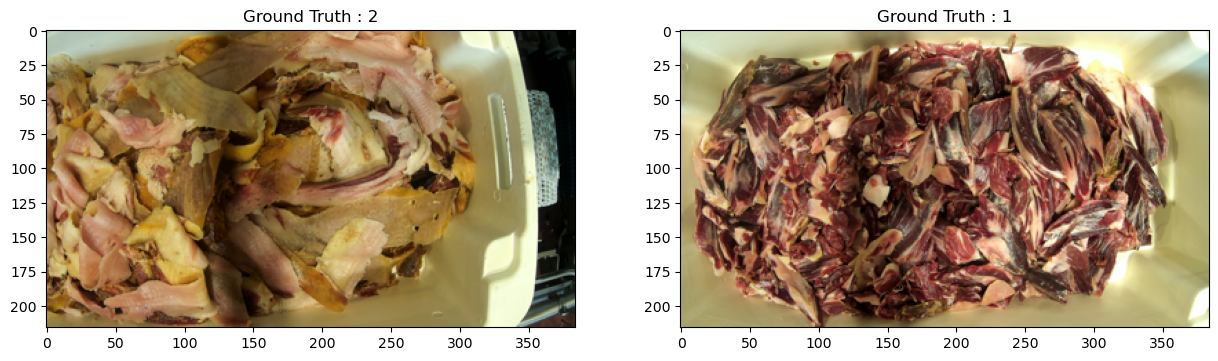

In [9]:
plt.figure(figsize=[15,15])

#Display the first image in training data
plt.subplot(1,2,1)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

#Display the first image in testing data
plt.subplot(1,2,2)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X
test_X = test_X

## Hacemos el One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1044, 216, 384, 3) (262, 216, 384, 3) (1044, 7) (262, 7)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
meat_model = Sequential()
meat_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(216,384,3)))
meat_model.add(LeakyReLU(alpha=0.1))
meat_model.add(MaxPooling2D((2, 2),padding='same'))
meat_model.add(Dropout(0.5))

meat_model.add(Flatten())
meat_model.add(Dense(32, activation='linear'))
meat_model.add(LeakyReLU(alpha=0.1))
meat_model.add(Dropout(0.5))
meat_model.add(Dense(nClasses, activation='softmax'))

2023-09-04 21:08:19.756813: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
meat_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 216, 384, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 216, 384, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 192, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 108, 192, 32)      0         
                                                                 
 flatten (Flatten)           (None, 663552)            0         
                                                                 
 dense (Dense)               (None, 32)                21233696  
                                                        

In [17]:
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
meat_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=lr_schedule),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [18]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
meat_train = meat_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/6
17/17 [==============================] - 29s 2s/step - loss: 65.1427 - accuracy: 0.3123 - val_loss: 12.8288 - val_accuracy: 0.5954
Epoch 2/6
17/17 [==============================] - 26s 2s/step - loss: 14.6054 - accuracy: 0.4320 - val_loss: 11.1311 - val_accuracy: 0.5954
Epoch 3/6
17/17 [==============================] - 27s 2s/step - loss: 8.7198 - accuracy: 0.4847 - val_loss: 4.3688 - val_accuracy: 0.6298
Epoch 4/6
17/17 [==============================] - 26s 2s/step - loss: 9.7280 - accuracy: 0.4904 - val_loss: 5.9474 - val_accuracy: 0.6450
Epoch 5/6
17/17 [==============================] - 30s 2s/step - loss: 13.3885 - accuracy: 0.4454 - val_loss: 3.7932 - val_accuracy: 0.7137
Epoch 6/6
17/17 [==============================] - 31s 2s/step - loss: 6.2175 - accuracy: 0.5067 - val_loss: 1.1437 - val_accuracy: 0.6069


In [19]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
meat_model.save("meat_mnist.h5py")

2023-09-04 21:11:43.895235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,108,192,32]
	 [[{{node inputs}}]]
2023-09-04 21:11:43.926434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-09-04 21:11:44.153698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,108,192,32]
	 [[{{node inputs}}]]
202

INFO:tensorflow:Assets written to: meat_mnist.h5py/assets


INFO:tensorflow:Assets written to: meat_mnist.h5py/assets


# Evaluamos la red

In [20]:
test_eval = meat_model.evaluate(test_X, test_Y_one_hot, verbose=1)

11/11 [==============================] - 2s 147ms/step - loss: 1.0335 - accuracy: 0.6055


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.033523440361023
Test accuracy: 0.60550457239151


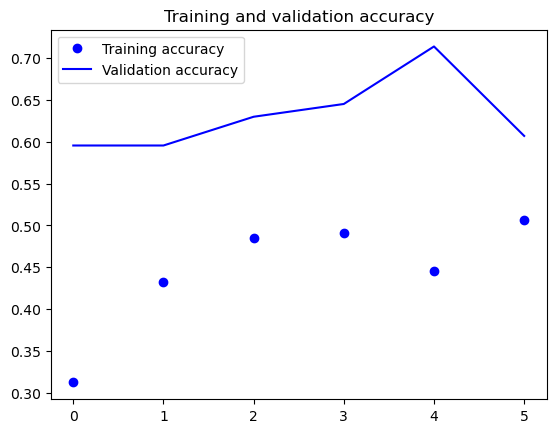

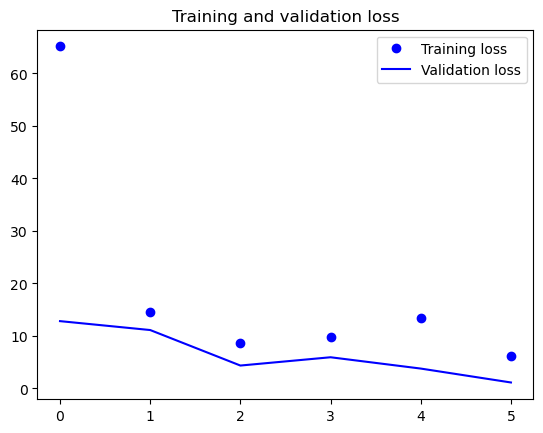

In [22]:
accuracy = meat_train.history['accuracy']
val_accuracy = meat_train.history['val_accuracy']
loss = meat_train.history['loss']
val_loss = meat_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = meat_model.predict(test_X)

11/11 [==============================] - 2s 154ms/step


In [24]:
predicted_classes=[]
for predicted_meat in predicted_classes2:
    predicted_classes.append(predicted_meat.tolist().index(max(predicted_meat)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((327,), (327,))

# Aprendamos de los errores: Qué mejorar

Found 198 correct labels


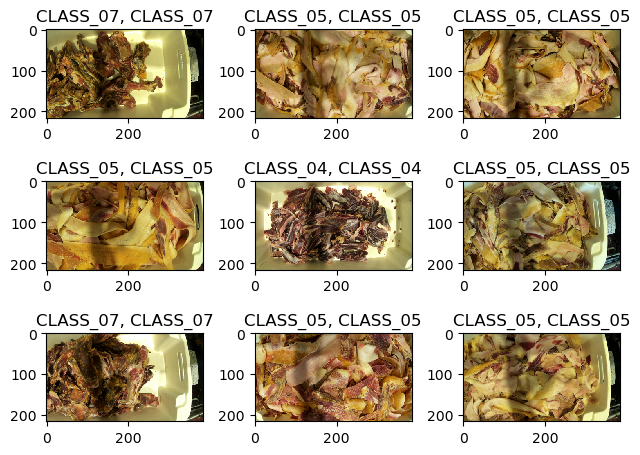

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(216,384,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(meat[predicted_classes[correct]],
                                                    meat[test_Y[correct]]))

    plt.tight_layout()

Found 129 incorrect labels


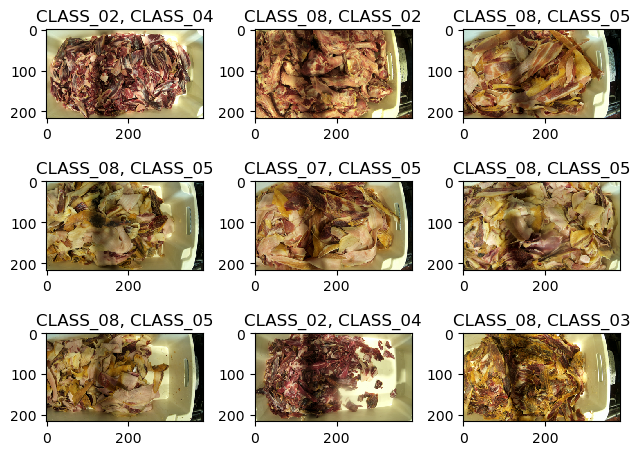

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(216,384,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(meat[predicted_classes[incorrect]],
                                                    meat[test_Y[incorrect]]))
    plt.tight_layout()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.25      0.03      0.05        39
     Class 1       0.88      0.29      0.44        24
     Class 2       0.90      0.73      0.81       181
     Class 3       0.19      0.42      0.26        12
     Class 4       0.53      0.89      0.66        44
     Class 5       1.00      0.86      0.92         7
     Class 6       0.13      0.40      0.20        20

    accuracy                           0.61       327
   macro avg       0.55      0.52      0.48       327
weighted avg       0.70      0.61      0.61       327



# Prediccion de una nueva imagen

In [29]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['DataSet/test/CLASS_07/17-CAPTURE_20220420_174411_517.png']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (216, 384),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X

predicted_classes = meat_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], meat[img_tagged.tolist().index(max(img_tagged))])

1/1 [==============================] - 0s 31ms/step
DataSet/test/CLASS_07/17-CAPTURE_20220420_174411_517.png CLASS_06
